
<a id='python-by-example'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# An Introductory Example


<a id='index-0'></a>

## Contents

- [An Introductory Example](#An-Introductory-Example)  
  - [Overview](#Overview)  
  - [The Task: Plotting a White Noise Process](#The-Task:-Plotting-a-White-Noise-Process)  
  - [Version 1](#Version-1)  
  - [Alternative Implementations](#Alternative-Implementations)  
  - [Another Application](#Another-Application)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

We’re now ready to start learning the Python language itself.

In this lecture, we will write and then pick apart small Python programs.

The objective is to introduce you to basic Python syntax and data structures.

Deeper concepts will be covered in later lectures.

You should have read the [lecture](https://python.quantecon.org/getting_started.html) on getting started with Python before beginning this one.

## The Task: Plotting a White Noise Process

Suppose we want to simulate and plot the white noise
process $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, where each draw $ \epsilon_t $ is independent standard normal.

In other words, we want to generate figures that look something like this:

<img src="https://s3-ap-southeast-2.amazonaws.com/python.quantecon.org/_static/lecture_specific/python_by_example/test_program_1_updated.png" style="">

  
(Here $ t $ is on the horizontal axis and $ \epsilon_t $ is on the
vertical axis.)

We’ll do this in several different ways, each time learning something more
about Python.

We run the following command first, which helps ensure that plots appear in the
notebook if you run it on your own machine.

In [ ]:
%matplotlib inline

## Version 1


<a id='ourfirstprog'></a>
Here are a few lines of code that perform the task we set

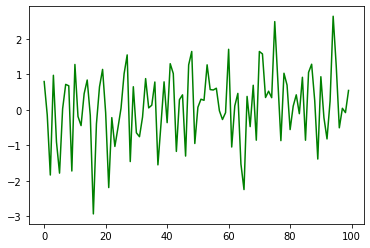

In [10]:
import numpy as np
import matplotlib.pyplot as plt

ϵ_values = np.random.randn(100)
plt.plot(ϵ_values, '-g', label = "TIME SERIES")
plt.show()

Let’s break this program down and see how it works.


<a id='import'></a>

### Imports

The first two lines of the program import functionality from external code
libraries.

The first line imports [NumPy](https://python.quantecon.org/numpy.html), a favorite Python package for tasks like

- working with arrays (vectors and matrices)  
- common mathematical functions like `cos` and `sqrt`  
- generating random numbers  
- linear algebra, etc.  


After `import numpy as np` we have access to these attributes via the syntax `np.attribute`.

Here’s two more examples

In [7]:
np.sqrt(4)

2.0

In [8]:
np.log(4)

1.3862943611198906

We could also use the following syntax:

In [ ]:
import numpy

numpy.sqrt(4)

But the former method (using the short name `np`) is convenient and more standard.

#### Why So Many Imports?

Python programs typically require several import statements.

The reason is that the core language is deliberately kept small, so that it’s easy to learn and maintain.

When you want to do something interesting with Python, you almost always need
to import additional functionality.

#### Packages


<a id='index-1'></a>
As stated above, NumPy is a Python *package*.

Packages are used by developers to organize code they wish to share.

In fact, a package is just a directory containing

1. files with Python code — called **modules** in Python speak  
1. possibly some compiled code that can be accessed by Python (e.g., functions compiled from C or FORTRAN code)  
1. a file called `__init__.py` that specifies what will be executed when we type `import package_name`  


In fact, you can find and explore the directory for NumPy on your computer
easily enough if you look around.

On this machine, it’s located in

```ipython
anaconda3/lib/python3.7/site-packages/numpy
```


#### Subpackages


<a id='index-2'></a>
Consider the line `ϵ_values = np.random.randn(100)`.

Here `np` refers to the package NumPy, while `random` is a **subpackage** of NumPy.

Subpackages are just packages that are subdirectories of another package.

### Importing Names Directly

Recall this code that we saw above

In [ ]:
import numpy as np

np.sqrt(4)

Here’s another way to access NumPy’s square root function

In [ ]:
from numpy import sqrt

sqrt(4)

This is also fine.

The advantage is less typing if we use `sqrt` often in our code.

The disadvantage is that, in a long program, these two lines might be
separated by many other lines.

Then it’s harder for readers to know where `sqrt` came from, should they wish to.

### Random Draws

Returning to our program that plots white noise, the remaining three lines
after the import statements are

In [ ]:
ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

The first line generates 100 (quasi) independent standard normals and stores
them in `ϵ_values`.

The next two lines genererate the plot.

We can and will look at various ways to configure and improve this plot below.

## Alternative Implementations

Let’s try writing some alternative versions of [our first program](#ourfirstprog), which plotted IID draws from the normal distribution.

The programs below are less efficient than the original one, and hence
somewhat artificial.

But they do help us illustrate some important Python syntax and semantics in a familiar setting.

### A Version with a For Loop

Here’s a version that illustrates `for` loops and Python lists.


<a id='firstloopprog'></a>

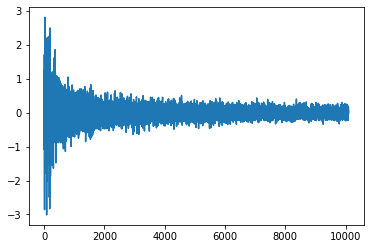

In [20]:
ts_length = 100
ϵ_values = []   # empty list
avg_100_values = []

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)
    
    
for v in range (1, 101):
    for i in range(ts_length):
        e = np.random.randn(v)
        avg = np.average(e)
        ϵ_values.append(avg)
    
    
plt.plot(ϵ_values)
plt.plot(avg_100_values)

plt.show()

-0.24272175374820118
-0.785726296707186
0.15463414247270252
1.664154794747019
1.0461819815155498
2.416910681636081
-0.7507880436252715
-0.03804545898951402
1.3113949481371483
-0.06332395318082866
-0.07249457115867984
0.029276829961788087
0.010106000247790663
0.9376519495929241
-0.9033289209003552
-0.2418996598929618
0.5800983308881699
1.5982607195703369
0.756281611036642
1.9380274310368668
-1.5376467367973852
0.1299869192776785
-0.3465205848954677
-0.3728128296282385
-0.5018424836569235
1.105714118184524
0.4282011332435003
-0.6559113327312494
0.45837545438709987
0.44422143414624055
0.4709719405361777
-0.30364414959167657
-1.4537908762830358
-1.495304730603883
0.6059205920089638
-0.7703912933492114
-2.0471338699904433
-0.9632958640936786
0.9635344295462954
0.8213581141021422
-0.3275323999261538
-1.2177733233498742
0.7326574617835664
1.0374835747016522
1.1073831436457264
-0.458571612504027
-1.0734526452587678
0.5163707845922342
-0.5509199437643372
-1.0612556295085613
1.4731153136241255
-

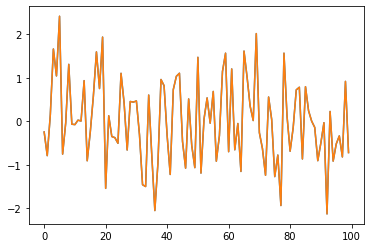

In [28]:
lst = []
for times in range(1, 101):
    e = np.random.randn()
    lst.append([e,e])   
    print(e)
    
plt.plot(lst)

In brief,

- The first line sets the desired length of the time series.  
- The next line creates an empty *list* called `ϵ_values` that will store the $ \epsilon_t $ values as we generate them.  
- The statement `# empty list` is a *comment*, and is ignored by Python’s interpreter.  
- The next three lines are the `for` loop, which repeatedly draws a new random number $ \epsilon_t $ and appends it to the end of the list `ϵ_values`.  
- The last two lines generate the plot and display it to the user.  


Let’s study some parts of this program in more detail.


<a id='lists-ref'></a>

### Lists


<a id='index-3'></a>
Consider the statement `ϵ_values = []`, which creates an empty list.

Lists are a *native Python data structure* used to group a collection of objects.

For example, try

In [ ]:
x = [10, 'foo', False]
type(x)

The first element of `x` is an [integer](https://en.wikipedia.org/wiki/Integer_%28computer_science%29), the next is a [string](https://en.wikipedia.org/wiki/String_%28computer_science%29), and the third is a [Boolean value](https://en.wikipedia.org/wiki/Boolean_data_type).

When adding a value to a list, we can use the syntax `list_name.append(some_value)`

In [ ]:
x

In [ ]:
x.append(2.5)
x

Here `append()` is what’s called a *method*, which is a function “attached to” an object—in this case, the list `x`.

We’ll learn all about methods later on, but just to give you some idea,

- Python objects such as lists, strings, etc. all have methods that are used to manipulate the data contained in the object.  
- String objects have [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods), list objects have [list methods](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists), etc.  


Another useful list method is `pop()`

In [ ]:
x

In [ ]:
x.pop()

In [ ]:
x

Lists in Python are zero-based (as in C, Java or Go), so the first element is referenced by `x[0]`

In [ ]:
x[0]   # first element of x

In [ ]:
x[1]   # second element of x

### The For Loop


<a id='index-4'></a>
Now let’s consider the `for` loop from [the program above](#firstloopprog), which was

In [ ]:
for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

Python executes the two indented lines `ts_length` times before moving on.

These two lines are called a `code block`, since they comprise the “block” of code that we are looping over.

Unlike most other languages, Python knows the extent of the code block *only from indentation*.

In our program, indentation decreases after line `ϵ_values.append(e)`, telling Python that this line marks the lower limit of the code block.

More on indentation below—for now, let’s look at another example of a `for` loop

In [ ]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

This example helps to clarify how the `for` loop works:  When we execute a
loop of the form

```python3
for variable_name in sequence:
    <code block>
```


The Python interpreter performs the following:

- For each element of the `sequence`, it “binds” the name `variable_name` to that element and then executes the code block.  


The `sequence` object can in fact be a very general object, as we’ll see
soon enough.

### A Comment on Indentation


<a id='index-5'></a>
In discussing the `for` loop, we explained that the code blocks being looped over are delimited by indentation.

In fact, in Python, **all** code blocks (i.e., those occurring inside loops, if clauses, function definitions, etc.) are delimited by indentation.

Thus, unlike most other languages, whitespace in Python code affects the output of the program.

Once you get used to it, this is a good thing: It

- forces clean, consistent indentation, improving readability  
- removes clutter, such as the brackets or end statements used in other languages  


On the other hand, it takes a bit of care to get right, so please remember:

- The line before the start of a code block always ends in a colon  
  
  - `for i in range(10):`  
  - `if x > y:`  
  - `while x < 100:`  
  - etc., etc.  
  
- All lines in a code block **must have the same amount of indentation**.  
- The Python standard is 4 spaces, and that’s what you should use.  

### While Loops


<a id='index-6'></a>
The `for` loop is the most common technique for iteration in Python.

But, for the purpose of illustration, let’s modify [the program above](#firstloopprog) to use a `while` loop instead.


<a id='whileloopprog'></a>

In [ ]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1
plt.plot(ϵ_values)
plt.show()

Note that

- the code block for the `while` loop is again delimited only by indentation  
- the statement  `i = i + 1` can be replaced by `i += 1`  

## Another Application

Let’s do one more application before we turn to exercises.

In this application, we plot the balance of a bank account over time.

There are no withdraws over the time period, the last date of which is denoted
by $ T $.

The initial balance is $ b_0 $ and the interest rate is $ r $.

The balance updates from period $ t $ to $ t+1 $ according to $ b_{t+1} = (1 + r) b_t $.

In the code below, we generate and plot the sequence $ b_0, b_1, \ldots, b_T $.

Instead of using a Python list to store this sequence, we will use a NumPy
array.

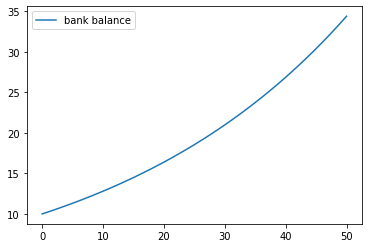

In [25]:
r = 0.025         # interest rate
T = 50            # end date
b = np.empty(T+1) # an empty NumPy array, to store all b_t
b[0] = 10         # initial balance

for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label='bank balance')
plt.legend()
plt.show()

The statement `b = np.empty(T+1)` allocates storage in memory for `T+1`
(floating point) numbers.

These numbers are filled in by the `for` loop.

Allocating memory at the start is more efficient than using a Python list and
`append`, since the latter must repeatedly ask for storage space from the
operating system.

Notice that we added a legend to the plot — a feature you will be asked to
use in the exercises.

## Exercises

Now we turn to exercises.  It is important that you complete them before
continuing, since they present new concepts we will need.

### Exercise 1

Your first task is to simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be IID and standard normal.

In your solution, restrict your import statements to

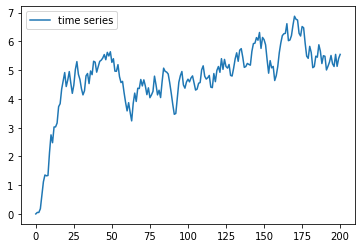

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def plotLinearSeries(alpha, x_initial, time, plotname):
    x_list = np.empty(time+1)
    x_list[0] = x_initial
    
    for i in range(time):
        e = np.random.rand()
        x_list[i+1] = alpha * x_list[i] + e
    
    plt.plot(x_list, label = plotname)
    plt.legend()

def plotAbsLinearSeries(alpha, x_initial, time, plotname):
    x_list = np.empty(time+1)
    x_list[0] = x_initial
    
    for i in range(time):
        e = np.random.rand()
        x_before = x_list[i] if x_list[i] >= 0 else (-1) * x_list[i]
        x_list[i+1] = alpha * abs(x_before) + e
    
    plt.plot(x_list, label = plotname)
    plt.legend()
    
plotLinearSeries(0.9, 0, 200, "time series" )
plt.show()

Set $ T=200 $ and $ \alpha = 0.9 $.

### Exercise 2

Starting with your solution to exercise 2, plot three simulated time series,
one for each of the cases $ \alpha=0 $, $ \alpha=0.8 $ and $ \alpha=0.98 $.

Use a `for` loop to step through the $ \alpha $ values.

If you can, add a legend, to help distinguish between the three time series.

Hints:

- If you call the `plot()` function multiple times before calling `show()`, all of the lines you produce will end up on the same figure.  
- For the legend, noted that the expression `'foo' + str(42)` evaluates to `'foo42'`.  

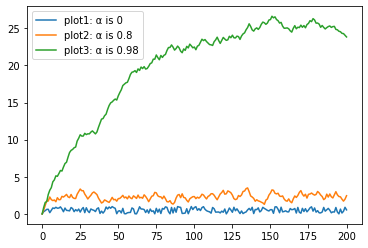

In [73]:
plotLinearSeries(0, 0, 200, "plot1: α is 0" )
plotLinearSeries(0.8, 0, 200, "plot2: α is 0.8")
plotLinearSeries(0.98, 0, 200, "plot3: α is 0.98")

plt.show()

### Exercise 3

Similar to the previous exercises, plot the time series

$$
x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

Use $ T=200 $, $ \alpha = 0.9 $ and $ \{\epsilon_t\} $ as before.

Search online for a function that can be used to compute the absolute value $ |x_t| $.

### Exercise 4

One important aspect of essentially all programming languages is branching and
conditions.

In Python, conditions are usually implemented with if–else syntax.

Here’s an example, that prints -1 for each negative number in an array and 1
for each nonnegative number

In [ ]:
numbers = [-9, 2.3, -11, 0]

In [ ]:
for x in numbers:
    if x < 0:
        print(-1)
    else:
        print(1)

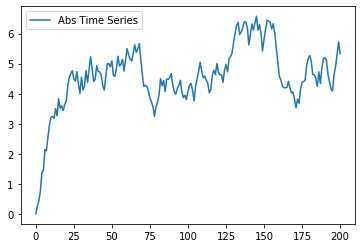

In [101]:
plotAbsLinearSeries(0.9, 0, 200, "Abs Time Series")

Now, write a new solution to Exercise 3 that does not use an existing function
to compute the absolute value.

Replace this existing function with an if–else condition.


<a id='pbe-ex3'></a>

### Exercise 5

Here’s a harder exercise, that takes some thought and planning.

The task is to compute an approximation to $ \pi $ using [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).

Use no imports besides

Trial  100 : π is  3.0
Trial  200 : π is  3.06
Trial  300 : π is  3.1466666666666665
Trial  400 : π is  3.16
Trial  500 : π is  3.152
Trial  600 : π is  3.1333333333333333
Trial  700 : π is  3.1142857142857143
Trial  800 : π is  3.115
Trial  900 : π is  3.1333333333333333
Trial  1000 : π is  3.14
Trial  1100 : π is  3.138181818181818
Trial  1200 : π is  3.15
Trial  1300 : π is  3.1507692307692308
Trial  1400 : π is  3.1685714285714286
Trial  1500 : π is  3.168
Trial  1600 : π is  3.1675
Trial  1700 : π is  3.152941176470588
Trial  1800 : π is  3.1422222222222222
Trial  1900 : π is  3.1494736842105264
Trial  2000 : π is  3.16
Trial  2100 : π is  3.163809523809524
Trial  2200 : π is  3.1618181818181816
Trial  2300 : π is  3.1652173913043478
Trial  2400 : π is  3.1533333333333333
Trial  2500 : π is  3.152
Trial  2600 : π is  3.146153846153846
Trial  2700 : π is  3.1525925925925926
Trial  2800 : π is  3.1585714285714284
Trial  2900 : π is  3.1544827586206896
Trial  3000 : π is  3.153333333

Trial  21900 : π is  3.1399086757990866
Trial  22000 : π is  3.14
Trial  22100 : π is  3.13972850678733
Trial  22200 : π is  3.140720720720721
Trial  22300 : π is  3.1397309417040358
Trial  22400 : π is  3.1398214285714285
Trial  22500 : π is  3.1397333333333335
Trial  22600 : π is  3.1401769911504425
Trial  22700 : π is  3.1406167400881055
Trial  22800 : π is  3.1410526315789475
Trial  22900 : π is  3.1407860262008733
Trial  23000 : π is  3.1419130434782607
Trial  23100 : π is  3.141991341991342
Trial  23200 : π is  3.141896551724138
Trial  23300 : π is  3.141974248927039
Trial  23400 : π is  3.1411965811965814
Trial  23500 : π is  3.1417872340425532
Trial  23600 : π is  3.142372881355932
Trial  23700 : π is  3.1426160337552744
Trial  23800 : π is  3.141512605042017
Trial  23900 : π is  3.1410878661087867
Trial  24000 : π is  3.1416666666666666
Trial  24100 : π is  3.142240663900415
Trial  24200 : π is  3.1416528925619835
Trial  24300 : π is  3.143045267489712
Trial  24400 : π is  3.1

Trial  42800 : π is  3.1509345794392525
Trial  42900 : π is  3.1507692307692308
Trial  43000 : π is  3.1508837209302327
Trial  43100 : π is  3.1509048723897912
Trial  43200 : π is  3.151111111111111
Trial  43300 : π is  3.1506697459584294
Trial  43400 : π is  3.1512442396313363
Trial  43500 : π is  3.1515402298850574
Trial  43600 : π is  3.1514678899082567
Trial  43700 : π is  3.1515789473684213
Trial  43800 : π is  3.151598173515982
Trial  43900 : π is  3.152164009111617
Trial  44000 : π is  3.1513636363636364
Trial  44100 : π is  3.151201814058957
Trial  44200 : π is  3.1516742081447964
Trial  44300 : π is  3.151331828442438
Trial  44400 : π is  3.1516216216216217
Trial  44500 : π is  3.1510112359550564
Trial  44600 : π is  3.1512107623318384
Trial  44700 : π is  3.1514988814317673
Trial  44800 : π is  3.1513392857142857
Trial  44900 : π is  3.1520712694877506
Trial  45000 : π is  3.1523555555555554
Trial  45100 : π is  3.1529046563192904
Trial  45200 : π is  3.152477876106195
Trial 

Trial  63700 : π is  3.1462480376766093
Trial  63800 : π is  3.146269592476489
Trial  63900 : π is  3.1461658841940534
Trial  64000 : π is  3.1465625
Trial  64100 : π is  3.146833073322933
Trial  64200 : π is  3.1466666666666665
Trial  64300 : π is  3.1469984447900465
Trial  64400 : π is  3.147080745341615
Trial  64500 : π is  3.147410852713178
Trial  64600 : π is  3.1473684210526316
Trial  64700 : π is  3.1471406491499225
Trial  64800 : π is  3.147283950617284
Trial  64900 : π is  3.1472419106317413
Trial  65000 : π is  3.1472615384615383
Trial  65100 : π is  3.1469124423963133
Trial  65200 : π is  3.1468098159509204
Trial  65300 : π is  3.147136294027565
Trial  65400 : π is  3.147217125382263
Trial  65500 : π is  3.1472977099236643
Trial  65600 : π is  3.147012195121951
Trial  65700 : π is  3.146910197869102
Trial  65800 : π is  3.1466261398176294
Trial  65900 : π is  3.1467071320182094
Trial  66000 : π is  3.146909090909091
Trial  66100 : π is  3.1465658093797275
Trial  66200 : π is

Trial  84500 : π is  3.14712426035503
Trial  84600 : π is  3.146761229314421
Trial  84700 : π is  3.146871310507674
Trial  84800 : π is  3.146933962264151
Trial  84900 : π is  3.1470906949352178
Trial  85000 : π is  3.147105882352941
Trial  85100 : π is  3.1474030552291423
Trial  85200 : π is  3.1473708920187793
Trial  85300 : π is  3.1474794841735054
Trial  85400 : π is  3.1475878220140516
Trial  85500 : π is  3.1477894736842105
Trial  85600 : π is  3.1478971962616824
Trial  85700 : π is  3.1476779463243876
Trial  85800 : π is  3.147692307692308
Trial  85900 : π is  3.1472409778812573
Trial  86000 : π is  3.1476279069767443
Trial  86100 : π is  3.1476887340301976
Trial  86200 : π is  3.148027842227378
Trial  86300 : π is  3.147995365005794
Trial  86400 : π is  3.1479166666666667
Trial  86500 : π is  3.1478381502890174
Trial  86600 : π is  3.1479907621247114
Trial  86700 : π is  3.148143021914648
Trial  86800 : π is  3.148110599078341
Trial  86900 : π is  3.1484004602991944
Trial  8700

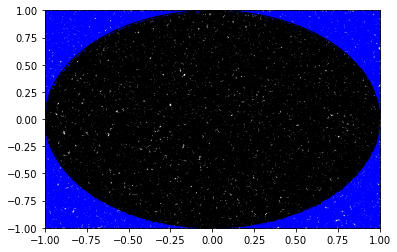

3.14652


In [100]:
import numpy as np

trial = 100000
inCircle = 0

# Draw circle with radius 1 : x^2 + y^2 = 1
circle = plt.Circle((0, 0), radius = 1, color='black', fill=False)
ax = plt.gca()
ax.add_artist(circle)

# Plot with uniform dist
for i in range(trial):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    
    if (x**2 + y**2 < 1):
        inCircle += 1
        plt.scatter(x, y, s = 1, color = "black")
    else:
        plt.scatter(x, y, s = 1, color = "blue")
        
        
    if ((i+1) % 100 == 0):
        print("Trial ", i+1, ": π is ", (inCircle / (i+1)) * 4 )
            
# Show the canvas and calculate the answer
plt.axis([-1, 1, -1, 1])
plt.show()

ratio = inCircle/trial
π = ratio * 4
print(π)

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $.  
- If $ U_1,\ldots,U_n $ are IID copies of $ U $, then, as $ n $ gets large, the fraction that falls in $ B $, converges to the probability of landing in $ B $.  
- For a circle, $ area = \pi * radius^2 $.  

## Solutions

### Exercise 1

Here’s one solution.

In [ ]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 2

In [ ]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

### Exercise 3

Here’s one solution:

In [ ]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 4

Here’s one way:

In [ ]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    if x[t] < 0:
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

Here’s a shorter way to write the same thing:

In [ ]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

### Exercise 5

Consider the circle of diameter 1 embedded in the unit square.

Let $ A $ be its area and let $ r=1/2 $ be its radius.

If we know $ \pi $ then we can compute $ A $ via
$ A = \pi r^2 $.

But here the point is to compute $ \pi $, which we can do by
$ \pi = A / r^2 $.

Summary: If we can estimate the area of a circle with diameter 1, then dividing
by $ r^2 = (1/2)^2 = 1/4 $ gives an estimate of $ \pi $.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that falls into the circle.

In [ ]:
n = 100000

count = 0
for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2